In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [152]:
df = pd.read_csv("cirrhosis.csv")
df = df[df['Status'] != "CL"]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             393 non-null    int64  
 1   N_Days         393 non-null    int64  
 2   Status         393 non-null    object 
 3   Drug           293 non-null    object 
 4   Age            393 non-null    int64  
 5   Sex            393 non-null    object 
 6   Ascites        293 non-null    object 
 7   Hepatomegaly   293 non-null    object 
 8   Spiders        293 non-null    object 
 9   Edema          393 non-null    object 
 10  Bilirubin      393 non-null    float64
 11  Cholesterol    266 non-null    float64
 12  Albumin        393 non-null    float64
 13  Copper         291 non-null    float64
 14  Alk_Phos       293 non-null    float64
 15  SGOT           293 non-null    float64
 16  Tryglicerides  264 non-null    float64
 17  Platelets      382 non-null    float64
 18  Prothrombin    

In [153]:
df['Status'].value_counts()

Status
C    232
D    161
Name: count, dtype: int64

In [154]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             393 non-null    int64  
 1   N_Days         393 non-null    int64  
 2   Status         393 non-null    object 
 3   Drug           293 non-null    object 
 4   Age            393 non-null    int64  
 5   Sex            393 non-null    object 
 6   Ascites        293 non-null    object 
 7   Hepatomegaly   293 non-null    object 
 8   Spiders        293 non-null    object 
 9   Edema          393 non-null    object 
 10  Bilirubin      393 non-null    float64
 11  Cholesterol    266 non-null    float64
 12  Albumin        393 non-null    float64
 13  Copper         291 non-null    float64
 14  Alk_Phos       293 non-null    float64
 15  SGOT           293 non-null    float64
 16  Tryglicerides  264 non-null    float64
 17  Platelets      382 non-null    float64
 18  Prothrombin    

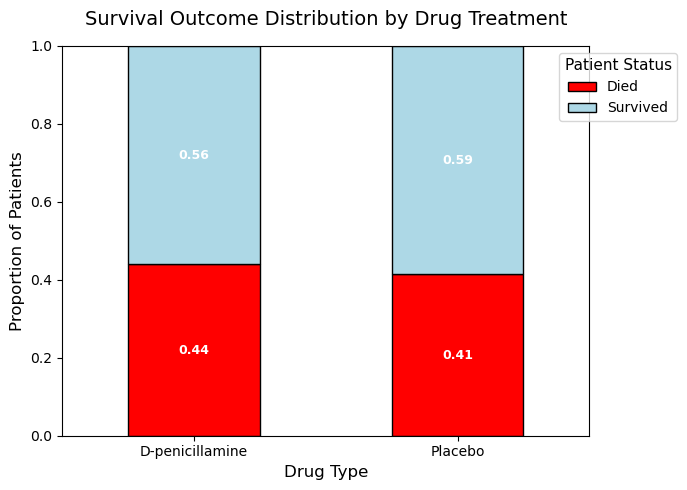

In [155]:
status_map = {"C": "Survived", "D": "Died"}
df["Status_final"] = df["Status"].map(status_map)
drug_status = pd.crosstab(df["Drug"], df["Status"], normalize="index")
drug_status = pd.crosstab(df["Drug"], df["Status_final"], normalize="index")
colors = {"Survived": "lightblue", "Died": "red"}
ax = drug_status.plot(kind="bar", stacked=True,
                      color=[colors.get(c, "lightgray") for c in drug_status.columns],
                      figsize=(7,5), edgecolor="black")
ax.set_title("Survival Outcome Distribution by Drug Treatment", fontsize=14, pad=15)
ax.set_xlabel("Drug Type", fontsize=12)
ax.set_ylabel("Proportion of Patients", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="center", fontsize=9, color="white", weight="bold")
ax.legend(
    title="Patient Status",
    title_fontsize=11,
    fontsize=10,
    loc="upper right",
    bbox_to_anchor=(1.18, 1)
)
plt.tight_layout()
plt.show()


In [156]:
contingency = pd.crosstab(df["Drug"], df["Status_final"])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square = {chi2:.3f}, p-value = {p:.3f}")

Chi-square = 0.103, p-value = 0.748


In [157]:
df['Drug'].value_counts()

Drug
D-penicillamine    148
Placebo            145
Name: count, dtype: int64

/var/folders/rk/jr3236_x1vs59t350crlllwm0000gn/T/ipykernel_57238/3546926394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


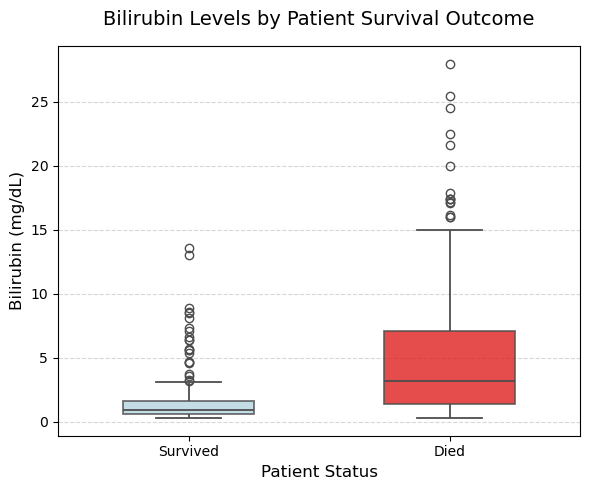

In [158]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    x="Status",
    y="Bilirubin",
    data=df,
    order=["C", "D"],
    palette=["lightblue", "red"],
    width=0.5,
    linewidth=1.3,
    boxprops=dict(alpha=0.8)
)
plt.title("Bilirubin Levels by Patient Survival Outcome", fontsize=14, pad=15)
plt.xlabel("Patient Status", fontsize=12)
plt.ylabel("Bilirubin (mg/dL)", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Survived", "Died"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/rk/jr3236_x1vs59t350crlllwm0000gn/T/ipykernel_57238/751474928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


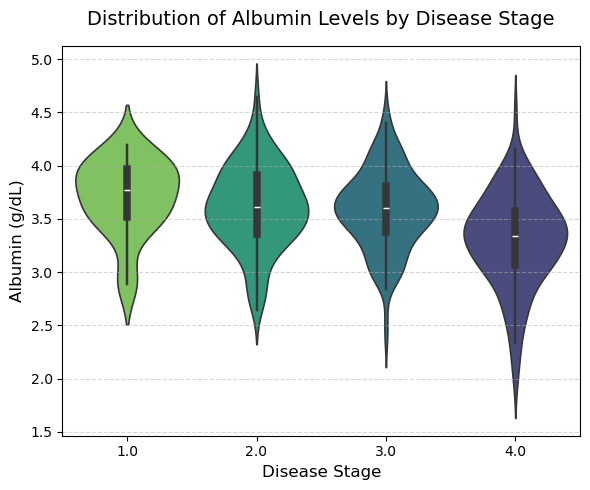

In [159]:
plt.figure(figsize=(6,5))
sns.violinplot(
    x="Stage",
    y="Albumin",
    data=df,
    palette="viridis_r",
    inner="box",
    linewidth=1.2
)
plt.title("Distribution of Albumin Levels by Disease Stage", fontsize=14, pad=15)
plt.xlabel("Disease Stage", fontsize=12)
plt.ylabel("Albumin (g/dL)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [160]:
"""
df["Died_flag"] = (df["Status_final"] == "Died").astype(int)

stage_summary = df.groupby("Stage")["Died_flag"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(x="Stage", y="Died_flag", data=stage_summary, marker="o", color="red")
plt.title("Death Rate by Disease Stage", fontsize=14, pad=15)
plt.xlabel("Disease Stage", fontsize=12)
plt.ylabel("Proportion Died", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
"""


'\ndf["Died_flag"] = (df["Status_final"] == "Died").astype(int)\n\nstage_summary = df.groupby("Stage")["Died_flag"].mean().reset_index()\n\nplt.figure(figsize=(6,4))\nsns.lineplot(x="Stage", y="Died_flag", data=stage_summary, marker="o", color="red")\nplt.title("Death Rate by Disease Stage", fontsize=14, pad=15)\nplt.xlabel("Disease Stage", fontsize=12)\nplt.ylabel("Proportion Died", fontsize=12)\nplt.grid(True, linestyle="--", alpha=0.5)\nplt.tight_layout()\nplt.show()\n'

In [161]:
RANDOM_STATE = 42
TEST_SIZE = 0.2
VAL_SIZE = 0.2 
TARGET_LABELS = {"C": "Survived", "D": "Died"}
if "Status_final" not in df.columns:
    df["Status_final"] = df["Status"].map(TARGET_LABELS)

df_bin = df[df["Status_final"].isin(["Survived", "Died"])].copy()

y_text = df_bin["Status_final"].copy()
y = (df_bin["Status_final"] == "Died").astype(int)
X = df_bin.drop(columns=["Status_final", "Status", "ID"])


missing_per_col = X.isna().mean().sort_values(ascending=False)
frac_rows_with_any_missing = X.isna().any(axis=1).mean()
frac_features_with_missing = (missing_per_col > 0).mean()

print("Before Preprocessing")
print(f"Rows: {len(X)}")
print(f"Features: {X.shape[1]}")
print(f"Fraction of rows with any missing values: {frac_rows_with_any_missing}")
print(f"Fraction of features with any missing values: {frac_features_with_missing}")
print("\nTop features by missing fraction:")
print(missing_per_col.head(25).to_frame("missing_frac"))

Before Preprocessing
Rows: 393
Features: 18
Fraction of rows with any missing values: 0.3435114503816794
Fraction of features with any missing values: 0.6666666666666666

Top features by missing fraction:
               missing_frac
Tryglicerides      0.328244
Cholesterol        0.323155
Copper             0.259542
Ascites            0.254453
Hepatomegaly       0.254453
Spiders            0.254453
SGOT               0.254453
Alk_Phos           0.254453
Drug               0.254453
Platelets          0.027990
Stage              0.015267
Prothrombin        0.005089
Albumin            0.000000
Bilirubin          0.000000
Edema              0.000000
Sex                0.000000
Age                0.000000
N_Days             0.000000


In [162]:
print(df["Status"].value_counts())

Status
C    232
D    161
Name: count, dtype: int64


In [163]:
df["Drug_missing"] = df["Drug"].isna()
pd.crosstab(df["Drug_missing"], df["Status_final"], normalize="index")

Status_final,Died,Survived
Drug_missing,,
False,0.426621,0.573379
True,0.360000,0.640000


In [170]:
TARGET_LABELS = {"C": "Survived", "D": "Died"}
if "Status_final" not in df.columns:
    df["Status_final"] = df["Status"].map(TARGET_LABELS)
df_bin = df[df["Status_final"].isin(["Survived", "Died"])].copy()
y = (df_bin["Status_final"] == "Died").astype(int)

df_clean = df_bin.drop(columns=["ID", "Drug", "N_Days", "Status_final", "Status", "Drug_missing"], errors="ignore")

col_thresh = int(0.6 * len(df_clean))
df_clean = df_clean.dropna(axis=1, thresh=col_thresh)
row_thresh = int(0.6 * df_clean.shape[1])
df_clean = df_clean.dropna(axis=0, thresh=row_thresh)

num_cols = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
            'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
ord_cols = ['Stage', 'Edema']
binary_cols = ['Ascites', 'Hepatomegaly', 'Spiders', 'Sex']

num_cols = [c for c in num_cols if c in df_clean.columns]
ord_cols = [c for c in ord_cols if c in df_clean.columns]
binary_cols = [c for c in binary_cols if c in df_clean.columns]

num_imputer = SimpleImputer(strategy='median')
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

cat_cols = ord_cols + binary_cols
cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])

if 'Edema' in df_clean.columns:
    df_clean['Edema'] = df_clean['Edema'].map({'N': 0, 'S': 1, 'Y': 2})
if 'Stage' in df_clean.columns:
    df_clean['Stage'] = df_clean['Stage'].astype(int)
for col in binary_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].map({'N': 0, 'Y': 1, 'F': 0, 'M': 1})

scale_cols = [c for c in (num_cols + ord_cols) if c in df_clean.columns]
scaler = StandardScaler()
df_clean[scale_cols] = scaler.fit_transform(df_clean[scale_cols])

y = y.loc[df_clean.index]
df_clean = df_clean.reset_index(drop=True)
y = y.reset_index(drop=True)

X_train, X_temp, y_train, y_temp = train_test_split(
    df_clean, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=y_temp
)

print("Data Split Summary:")
print(f"Train set: {len(X_train)} rows ({len(X_train)/len(df_clean):.1%})")
print(f"Validation set: {len(X_val)} rows ({len(X_val)/len(df_clean):.1%})")
print(f"Test set: {len(X_test)} rows ({len(X_test)/len(df_clean):.1%})")

print("\nClass distribution (1 = Died):")
for name, target in zip(["Train", "Validation", "Test"], [y_train, y_val, y_test]):
    print(f"{name}: {target.mean():.3f}")

Data Split Summary:
Train set: 205 rows (70.0%)
Validation set: 44 rows (15.0%)
Test set: 44 rows (15.0%)

Class distribution (1 = Died):
Train: 0.424
Validation: 0.432
Test: 0.432


In [171]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            293 non-null    float64
 1   Sex            293 non-null    int64  
 2   Ascites        293 non-null    int64  
 3   Hepatomegaly   293 non-null    int64  
 4   Spiders        293 non-null    int64  
 5   Edema          293 non-null    float64
 6   Bilirubin      293 non-null    float64
 7   Cholesterol    293 non-null    float64
 8   Albumin        293 non-null    float64
 9   Copper         293 non-null    float64
 10  Alk_Phos       293 non-null    float64
 11  SGOT           293 non-null    float64
 12  Tryglicerides  293 non-null    float64
 13  Platelets      293 non-null    float64
 14  Prothrombin    293 non-null    float64
 15  Stage          293 non-null    float64
dtypes: float64(12), int64(4)
memory usage: 36.8 KB
None
